In [104]:
import pandas as pd
import numpy as np
import datetime
import pytz
from importlib import reload
import darwin
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [105]:
reload(darwin)
folder = "/home/ben/data/darwin_measured/"
garpath = Path('/home/ben/data/GAR/')

In [106]:
stations = {
    "Santa Rosa": "09_AWS-PSantaRosa_data.csv",
    "Cerro Crocker": "11_AWS-PCerroCrocker_data.csv",
    "Sierra Negra": "14_AWS-PSierraNegra_data.csv",
    "Cueva de Sucre": "16_AWS-PCuevadeSucre_data.csv",
    "La Galapaguera": "18_AWS-PLaGalapaguera_data.csv",
    "El Junco": "20_AWS-PElJunco_data.csv",
    "Puerto Baquerizo Moreno": "22_AWS-PPuertoBaquerizoMoreno_data.csv",
    "Puerto Villamil": "24_AWS-PPuertoVillamil_data.csv",
    "Puerto Ayora": "26_AWS-PPuertoAyora_data.csv",
    "Military": "28_AWS-PMilitar_data.csv",
    "Minas Rojas": "30_AWS-PMinasRojas_data.csv",
}
for key, value in stations.items():
    df = darwin.open_measurements(folder + value)

In [107]:
datasets = {}
var = 'prcp'
aggregation = 'd'
start = "2022-04-01"
end = "2022-10-30"

paths = {
    'tropical': f'rc_trop_ls_tutorial_stations_{aggregation}_2d_{var}_2022.csv',
    'Kain-Fritsch (KF)': f'rc_trop_ls_KF_stations_{aggregation}_2d_{var}_2022.csv',
    'KF with kfeta-trigger': f'rc_trop_ls_KF_kfeta-trigger_stations_{aggregation}_2d_{var}_2022.csv',
    'KF Cumulus Potential': f'rc_trop_ls_KFCuP_stations_h_2d_{var}_2022.csv',
    'Grell 3D': f'rc_trop_ls_G3D_stations_d_2d_{var}_2022.csv',
    'Thompson': f'rc_trop_ls_TG_stations_d_2d_{var}_2022.csv',
    'MYNN': f'rc_trop_ls_MYNN_stations_d_2d_{var}_2022.csv',
    'MYNN-TG': f'rc_trop_ls_MYNN-TG_stations_d_2d_{var}_2022.csv',
    'KF-TG': f'rc_trop_ls_KF-TG_stations_d_2d_{var}_2022.csv',
    'KF-TG-MM5': f'rc_trop_ls_KF-TG-bpl_stations_d_2d_{var}_2022.csv',
    # 'tropical (early)': f'rc_trop_ls_vert43/rc_trop_ls_vert43_d02km_d_2d_{var}_2022.csv',
}

In [108]:
datasets = {}
var = 'prcp'
aggregation = 'd'
paths = {
    # 'tropical': f'rc_trop_ls_tutorial_stations_h_2d_{var}_2022.csv',
    # 'Kain-Fritsch (KF)': f'rc_trop_ls_KF_stations_h_2d_{var}_2022.csv',
    # 'KF with kfeta-trigger': f'rc_trop_ls_KF_kfeta-trigger_stations_h_2d_{var}_2022.csv',
    # 'KF Cumulus Potential': f'rc_trop_ls_KFCuP_stations_h_2d_{var}_2022.csv',
    'Grell 3D': f'rc_trop_ls_G3D_stations_d_2d_{var}_2022.csv',
    'Thompson': f'rc_trop_ls_TG_stations_d_2d_{var}_2022.csv',
    'MYNN': f'rc_trop_ls_MYNN_stations_d_2d_{var}_2022.csv',
    'MYNN-TG': f'rc_trop_ls_MYNN-TG_stations_d_2d_{var}_2022.csv',
    'KF-TG': f'rc_trop_ls_KF-TG_stations_d_2d_{var}_2022.csv',
    'KF-TG-MM5': f'rc_trop_ls_KF-TG-bpl_stations_d_2d_{var}_2022.csv',
    'MM': f'rc_trop_ls_MM_stations_{aggregation}_2d_{var}_2022.csv',
    # 'tropical (early)': f'rc_trop_ls_vert43/rc_trop_ls_vert43_d02km_d_2d_{var}_2022.csv',
}

In [109]:
for key, value in paths.items():
    datasets[key] = pd.read_csv(f"/home/ben/projects/darwin/{value}")
    datasets[key].index = pd.DatetimeIndex(datasets[key]["datetime"], tz=datetime.timezone.utc)
    datasets[key].drop("datetime", axis=1, inplace=True)
    datasets[key] = datasets[key].loc[start:end] * 24

In [110]:
reload(darwin)


metrics = pd.DataFrame(
    index = [
        "tropical",
        "Kain-Fritsch (KF)",
        "KF with kfeta-trigger",
        "KF Cumulus Potential",
        "Grell 3D",
        "Thompson",
        "MYNN",
        "MYNN-TG",
        "KF-TG",
        "KF-TG-MM5",
        "MM",
    ],
    columns = [
        "Correlation",
        "RMSE",
        "Mean Bias"
    ],
)
stations = {
    "rosa": "09_AWS-PSantaRosa_data.csv",
    "crocker": "11_AWS-PCerroCrocker_data.csv",
    "negra": "14_AWS-PSierraNegra_data.csv",
    "cuevadesucre": "16_AWS-PCuevadeSucre_data.csv",
    "lagalapaguera": "18_AWS-PLaGalapaguera_data.csv",
    "eljunco": "20_AWS-PElJunco_data.csv",
    "puertobaccerizomoreno": "22_AWS-PPuertoBaquerizoMoreno_data.csv",
    "puertovillamil": "24_AWS-PPuertoVillamil_data.csv",
    "puertoayora": "26_AWS-PPuertoAyora_data.csv",
    "militar": "28_AWS-PMilitar_data.csv",
    "minasrojas": "30_AWS-PMinasRojas_data.csv",
}

In [111]:
metrics

,Correlation,RMSE,Mean Bias
tropical,NaN,NaN,NaN
Kain-Fritsch (KF),NaN,NaN,NaN
KF with kfeta-trigger,NaN,NaN,NaN
KF Cumulus Potential,NaN,NaN,NaN
Grell 3D,NaN,NaN,NaN
Thompson,NaN,NaN,NaN
MYNN,NaN,NaN,NaN
MYNN-TG,NaN,NaN,NaN
KF-TG,NaN,NaN,NaN
KF-TG-MM5,NaN,NaN,NaN


In [112]:
reload(darwin)
from statistics import mean
for index, key_wrf in enumerate(datasets):
    correlations = []
    rmses = []
    mbes = []
    for key, value in stations.items():
        mf = darwin.open_measurements(folder + value)
        mf = mf.loc[start: end].resample("D").sum()
        if key != 'militar':
            correlations.append(datasets[key_wrf][key].corr(mf["PCP_diff_radar"], ))
            rmses.append(((datasets[key_wrf][key] - mf["PCP_diff_radar"]) ** 2).mean(skipna=True) ** .5)
            mbes.append((datasets[key_wrf][key] - mf["PCP_diff_radar"]).mean(skipna=True))
    metrics.at[key_wrf, "Correlation"] = np.around(np.nanmean(np.asarray(correlations)), decimals=2)
    metrics.at[key_wrf, "RMSE"] = np.around(np.nanmean(np.asarray(rmses)), decimals=1)
    metrics.at[key_wrf, "Mean Bias"] = np.around(np.nanmean(np.asarray(mbes)), decimals=2)

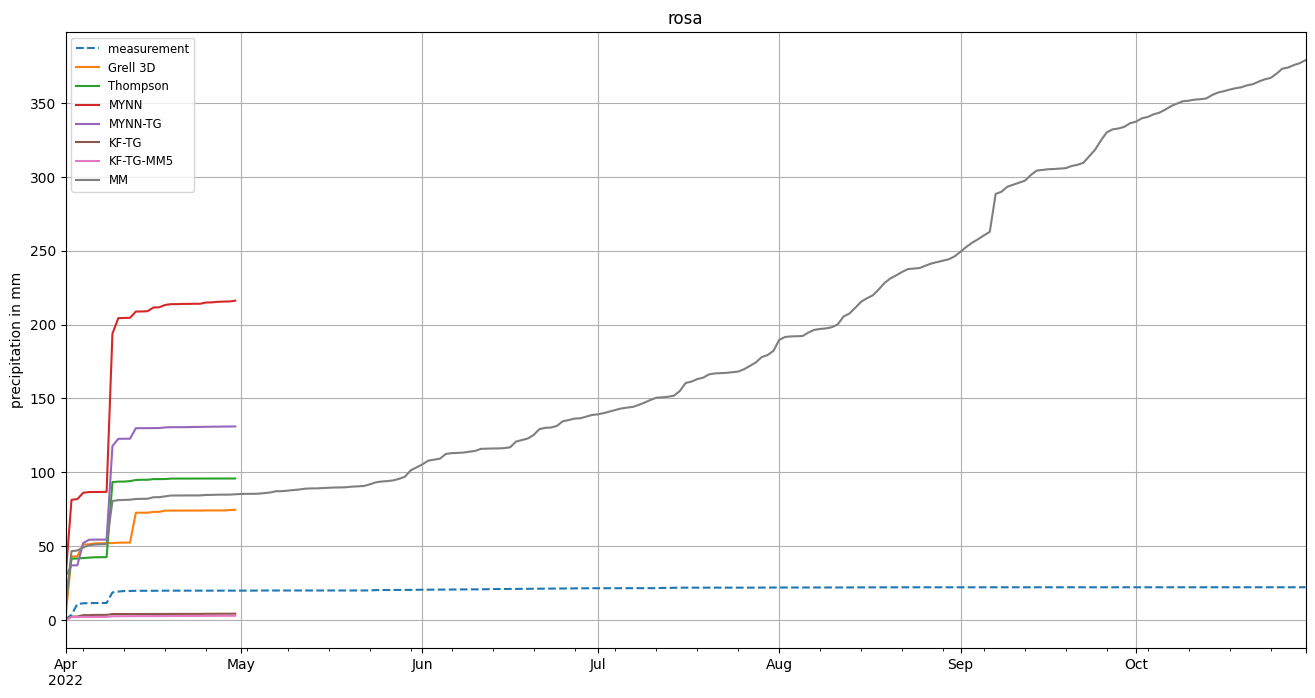

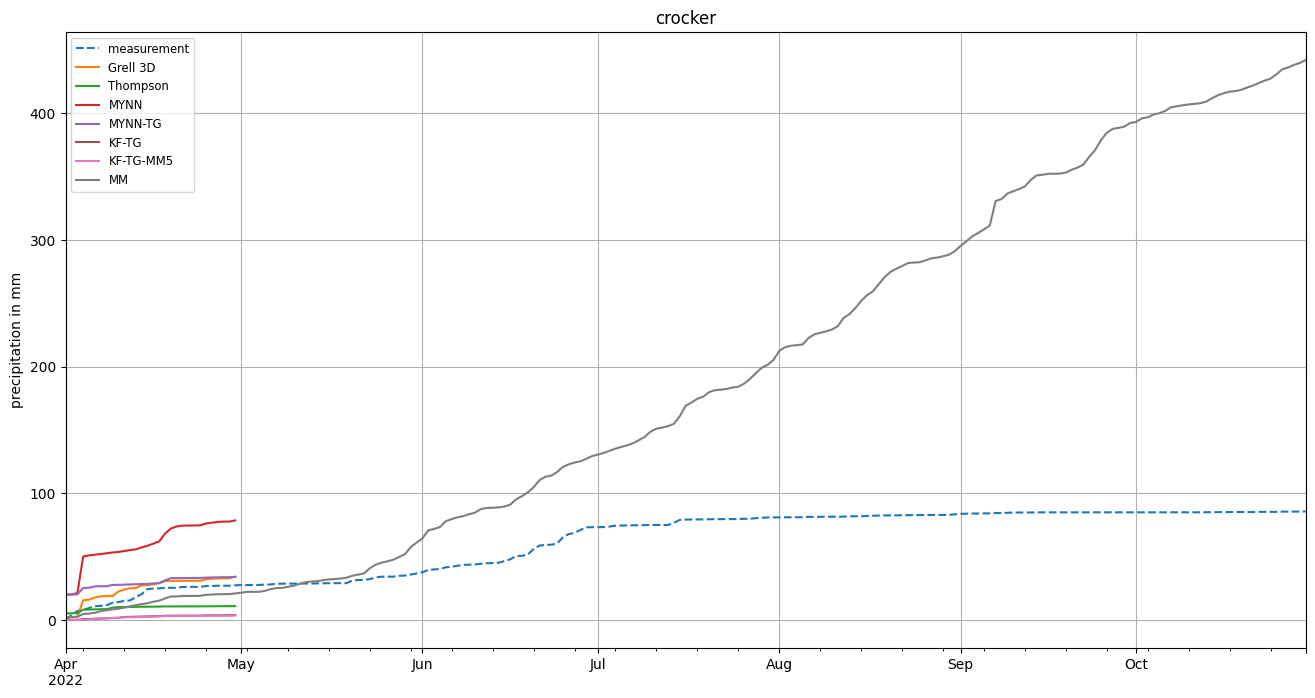

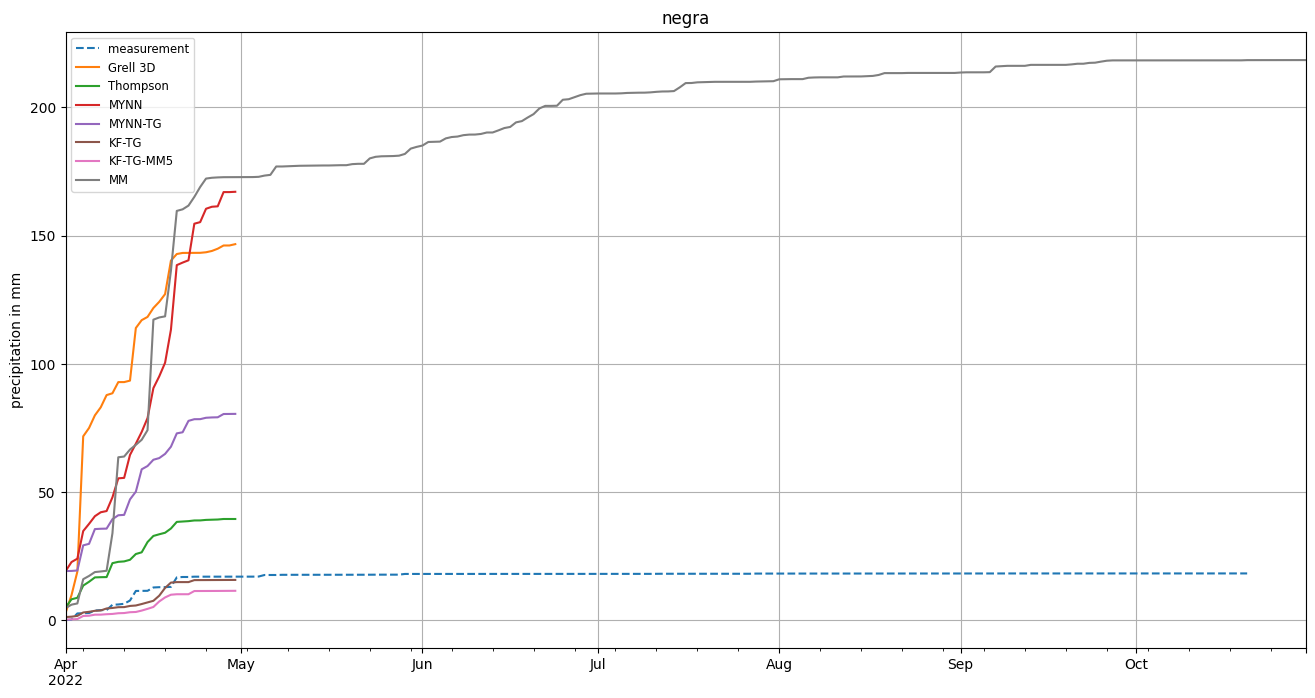

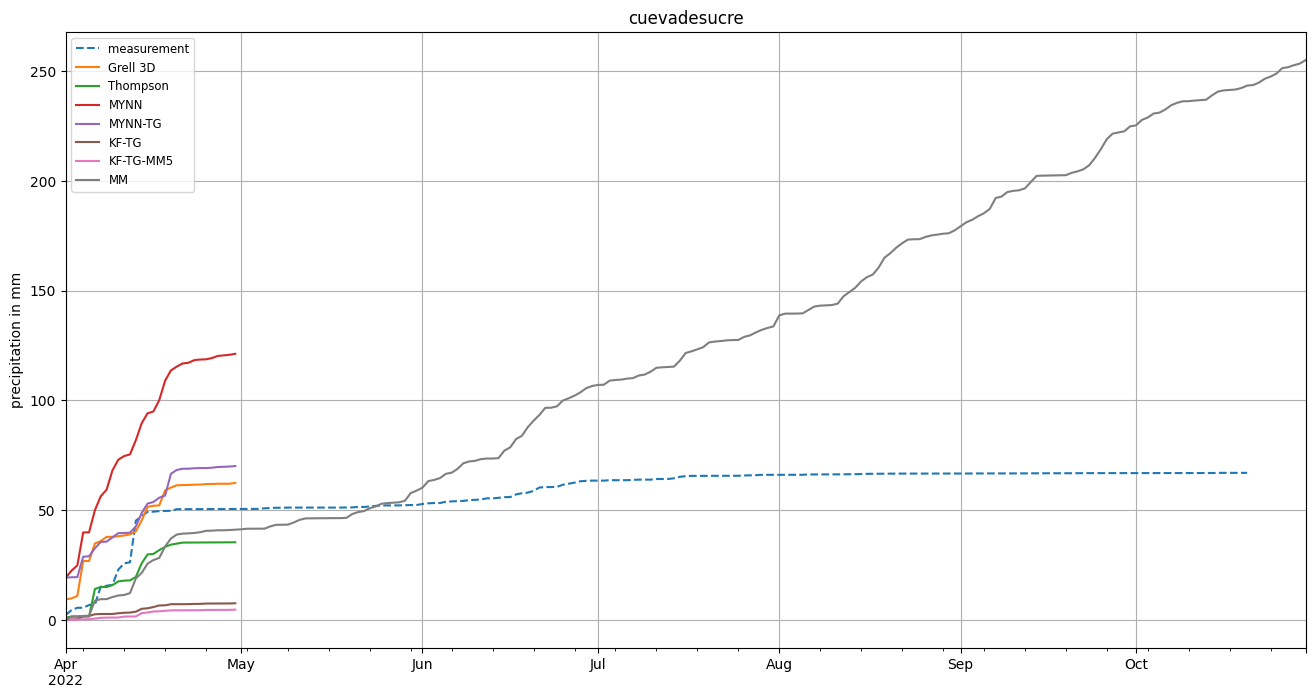

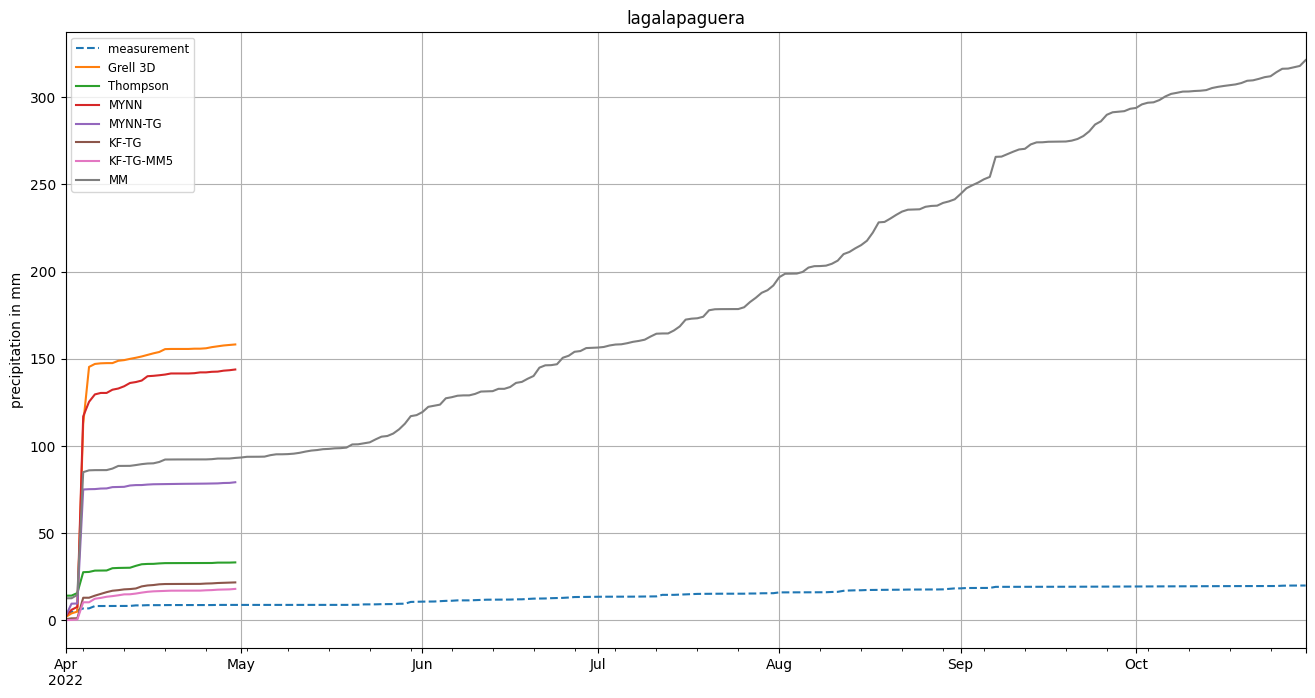

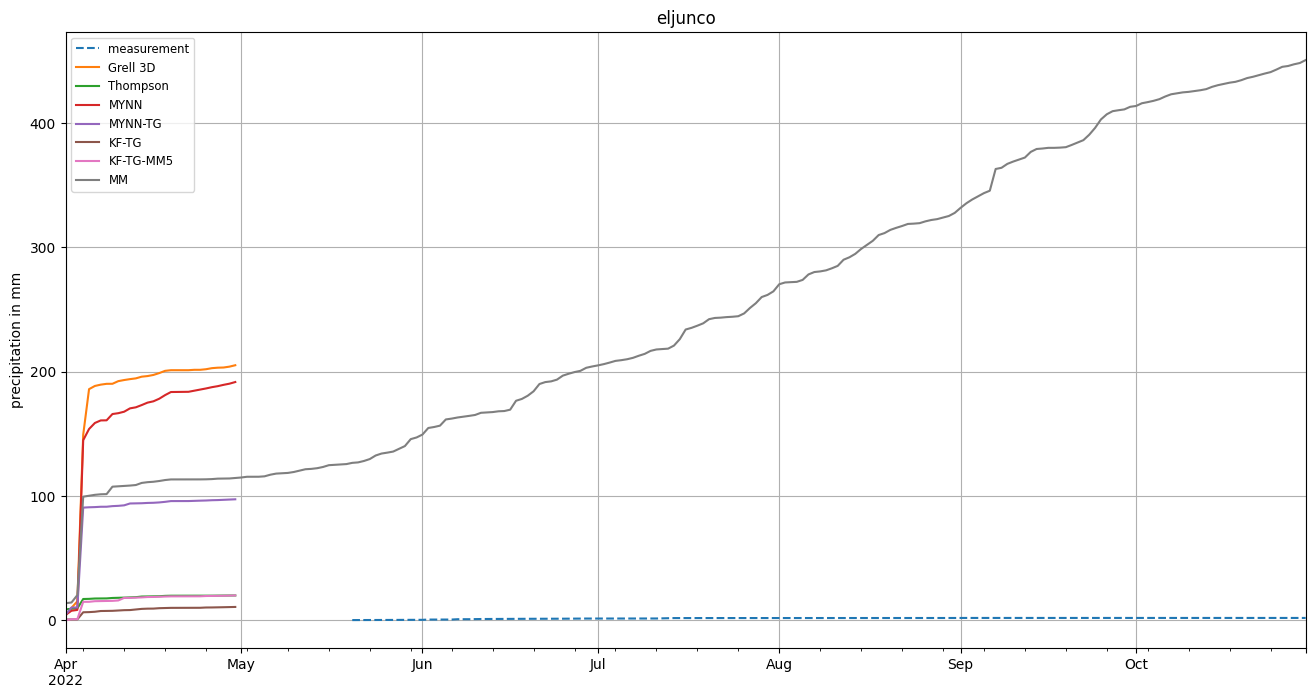

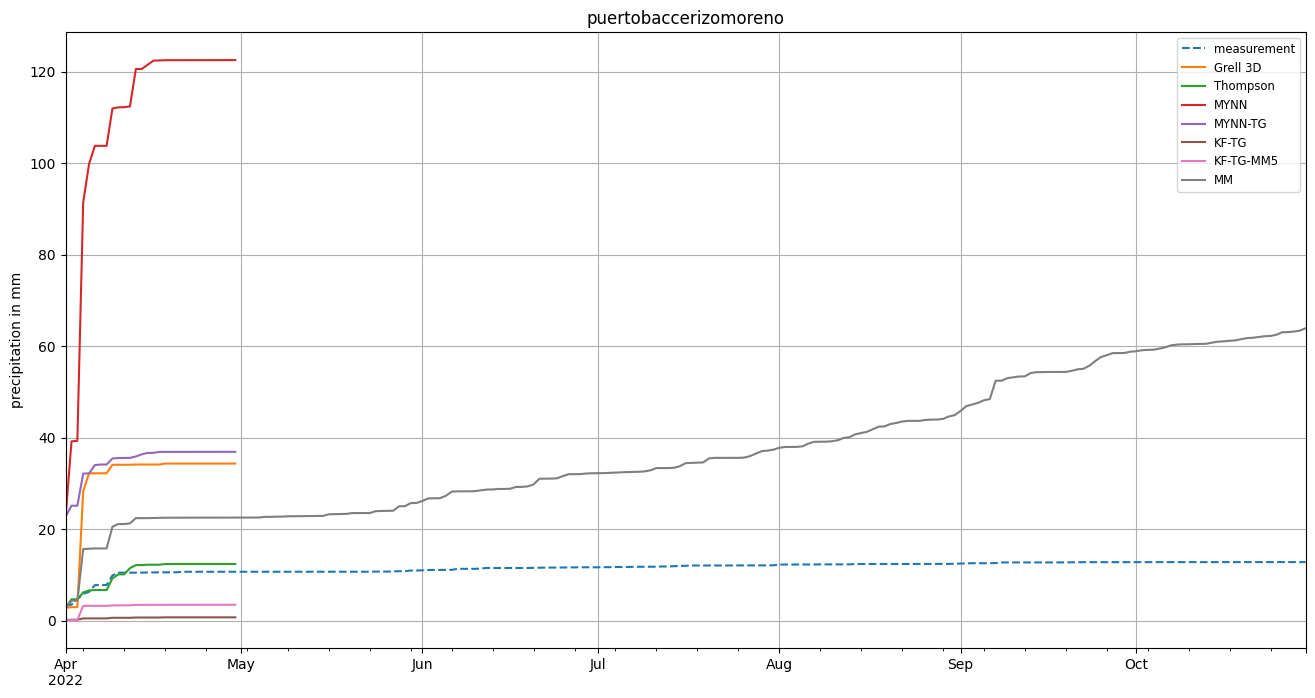

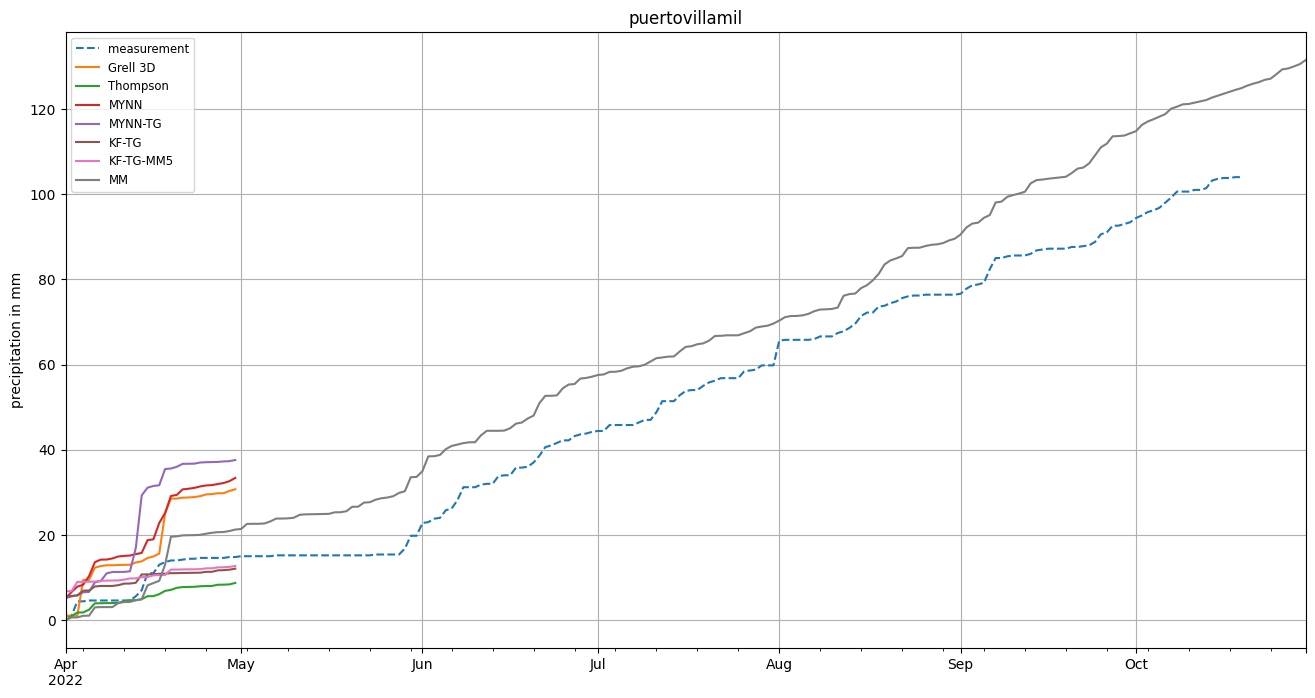

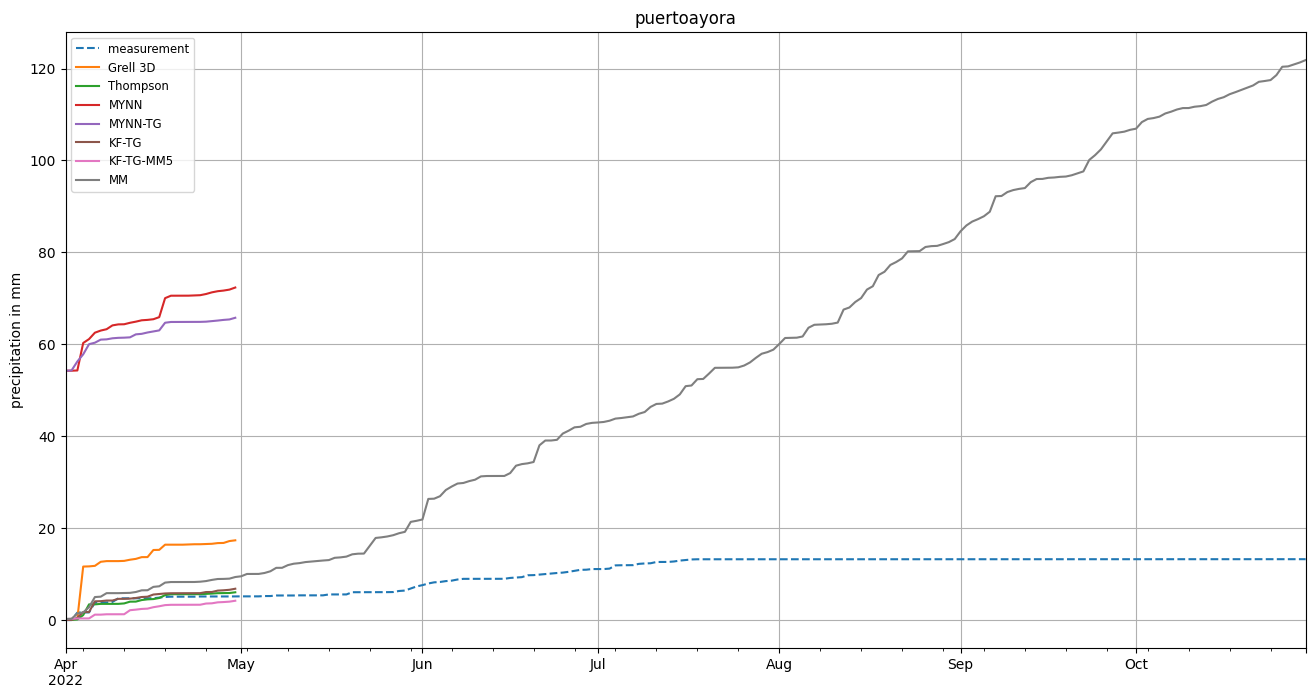

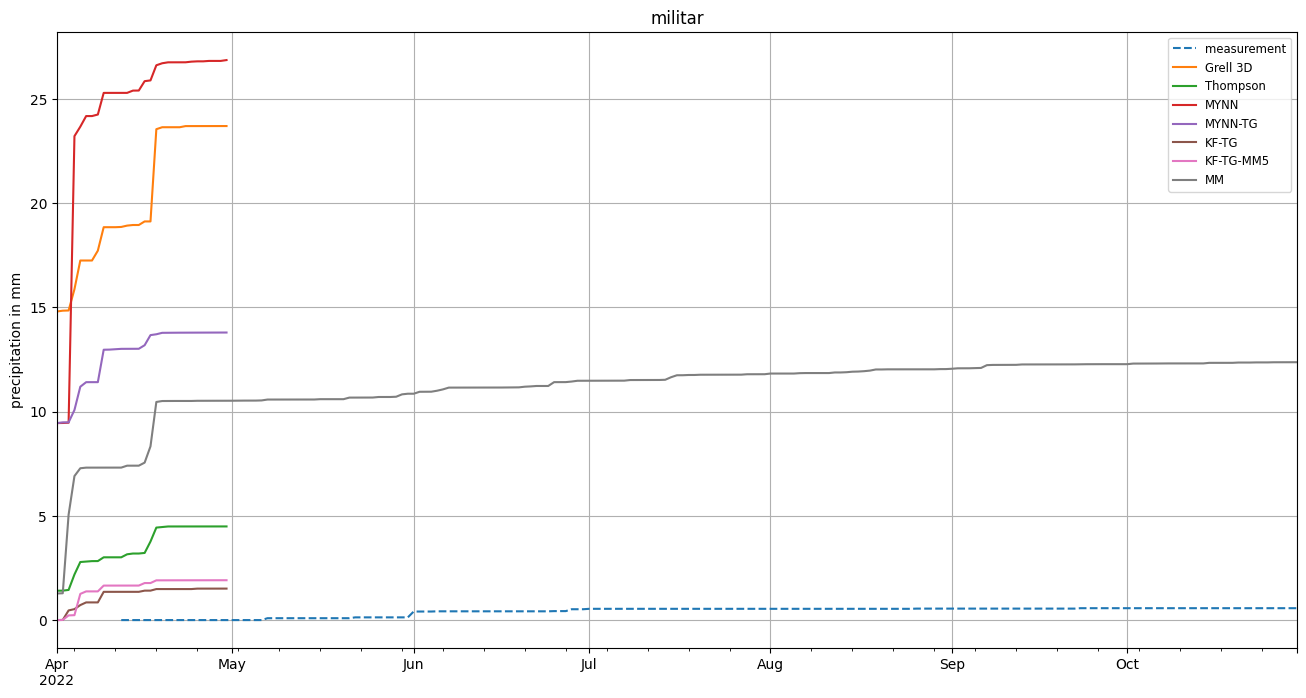

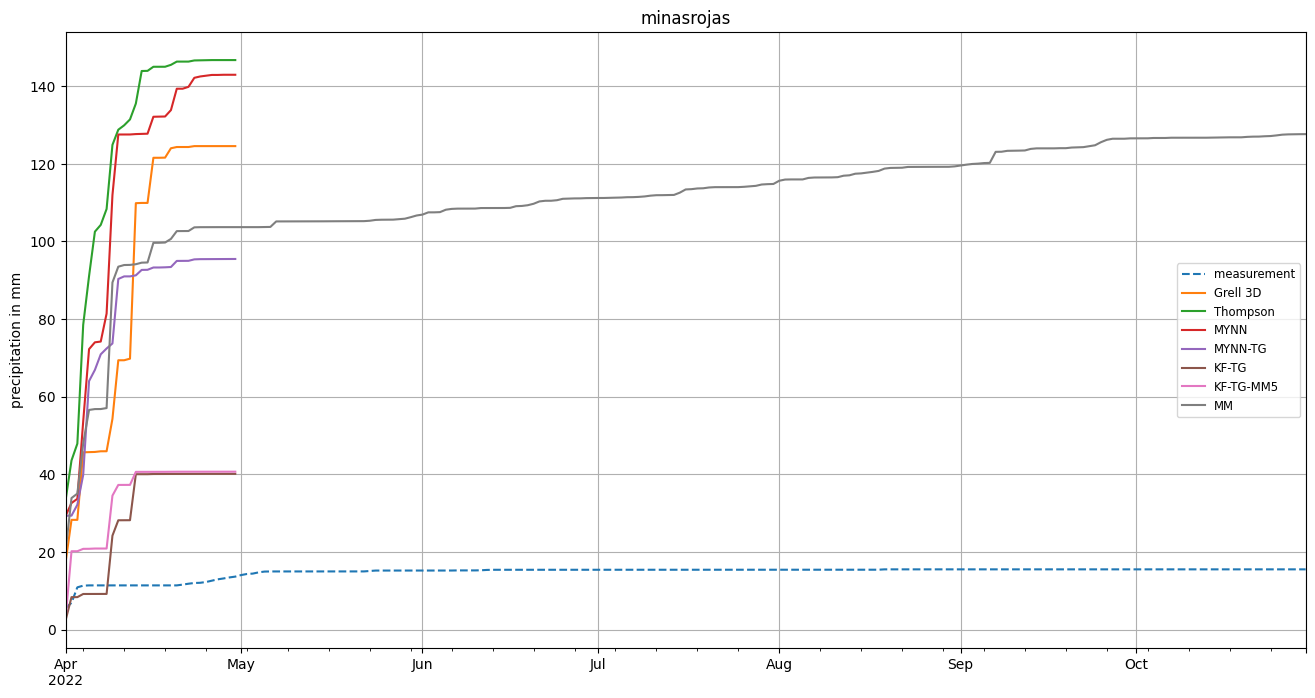

In [113]:
reload(darwin)

for key, value in stations.items():
    mf = darwin.open_measurements(folder + value)
    fig, ax = plt.subplots(figsize=(16,8), sharex=True, sharey=True, )
    mf = mf.loc[start: end].resample("D").sum()
    mf["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement", style="--")
    for index, key_wrf in enumerate(datasets):
        datasets[key_wrf][key].cumsum().plot(ax=ax, label=key_wrf)
    ax.set_title(key)
    ax.set_xlabel("")
    ax.set_ylabel("precipitation in mm")
    plt.legend(fontsize='small')
    plt.grid()
    # plt.savefig(f"comparison_{var}_{key}_station.png")
    plt.show()

In [92]:
# Correlations
reload(darwin)

stations = {
    "rosa": "09_AWS-PSantaRosa_data.csv",
    "crocker": "11_AWS-PCerroCrocker_data.csv",
    "negra": "14_AWS-PSierraNegra_data.csv",
    "cuevadesucre": "16_AWS-PCuevadeSucre_data.csv",
    "lagalapaguera": "18_AWS-PLaGalapaguera_data.csv",
    # "eljunco": "20_AWS-PElJunco_data.csv",
    "puertobaccerizomoreno": "22_AWS-PPuertoBaquerizoMoreno_data.csv",
    # "puertovillamil": "24_AWS-PPuertoVillamil_data.csv",
    "puertoayora": "26_AWS-PPuertoAyora_data.csv",
    "militar": "28_AWS-PMilitar_data.csv",
    "minasrojas": "30_AWS-PMinasRojas_data.csv",
}
for index, key_wrf in enumerate(datasets):
    if key != 'militar':
        for key, value in stations.items():
            stations[key] = darwin.open_measurements(folder + value)
            stations[key]["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement", style="--")
            correlations = []
            correlation = datasets[key_wrf][key].corr(stations[key]["PCP_diff_radar"])*100
            print(key_wrf, str(correlation))

Grell 3D nan
Grell 3D -5.912330374942305
Grell 3D -3.4152151647098554
Grell 3D 22.503472577095966
Grell 3D -3.2739483227824655
Grell 3D 22.281472624767463
Grell 3D nan
Grell 3D nan
Grell 3D nan


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U31'), dtype('float64')) -> None

ValueError: x and y must be the same size

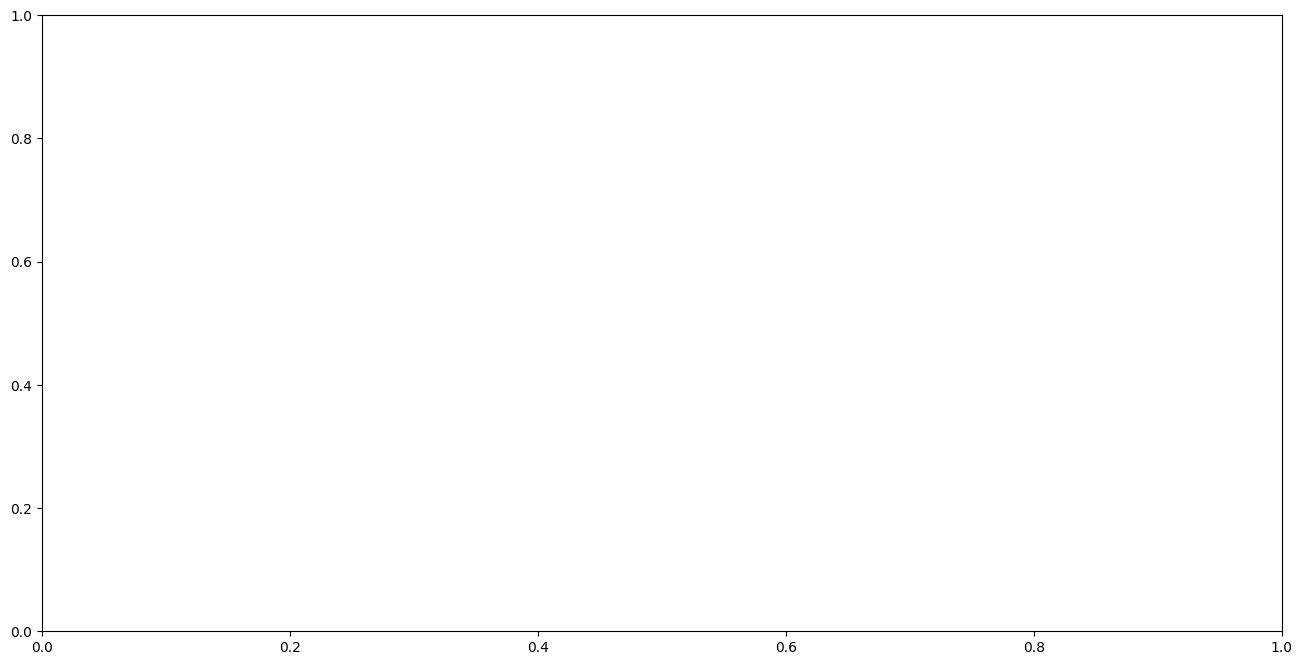

In [53]:
reload(darwin)

for key, value in stations.items():
    mf = darwin.open_measurements(folder + value)
    fig, ax = plt.subplots(figsize=(16,8), sharex=True, sharey=True, )
    mf = mf.loc[start: end].resample("D").sum()
    datasets['MM'].reindex_like(mf)
    ax.scatter(datasets['MM'].loc[start: end], mf)
    ax.set_title(key)
    ax.set_xlabel("")
    ax.set_ylabel("precipitation in mm")
    plt.legend(fontsize='small')
    plt.grid()
    # plt.savefig(f"comparison_{var}_{key}_station.png")
    plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
plt.scatter(df["PCP_diff_radar"].loc[start: end].resample("D").sum(), datasets['MM']['crocker'].loc[start:end])
plt.scatter(df["PCP_diff_radar"].loc[start: end].resample("D").sum(), datasets['MM']['puertobaquerizomoreno'].loc[start:end])
plt.scatter(df["PCP_diff_radar"].loc[start: end].resample("D").sum(), datasets['MM']['puertoayora'].loc[start:end])
plt.scatter(df["PCP_diff_radar"].loc[start: end].resample("D").sum(), datasets['MM']['cuevadesucre'].loc[start:end])
plt.scatter(df["PCP_diff_radar"].loc[start: end].resample("D").sum(), datasets['MM']['lagalapaguera'].loc[start:end])
plt.scatter(df["PCP_diff_radar"].loc[start: end].resample("D").sum(), datasets['MM']['rosa'].loc[start:end])
plt.scatter(df["PCP_diff_radar"].loc[start: end].resample("D").sum(), datasets['MM']['minasrojas'].loc[start:end])
plt.scatter(df["PCP_diff_radar"].loc[start: end].resample("D").sum(), datasets['MM']['militar'].loc[start:end])

plt.xlabel("measurements in mm")
plt.ylabel("WRF in mm")
plt.grid()

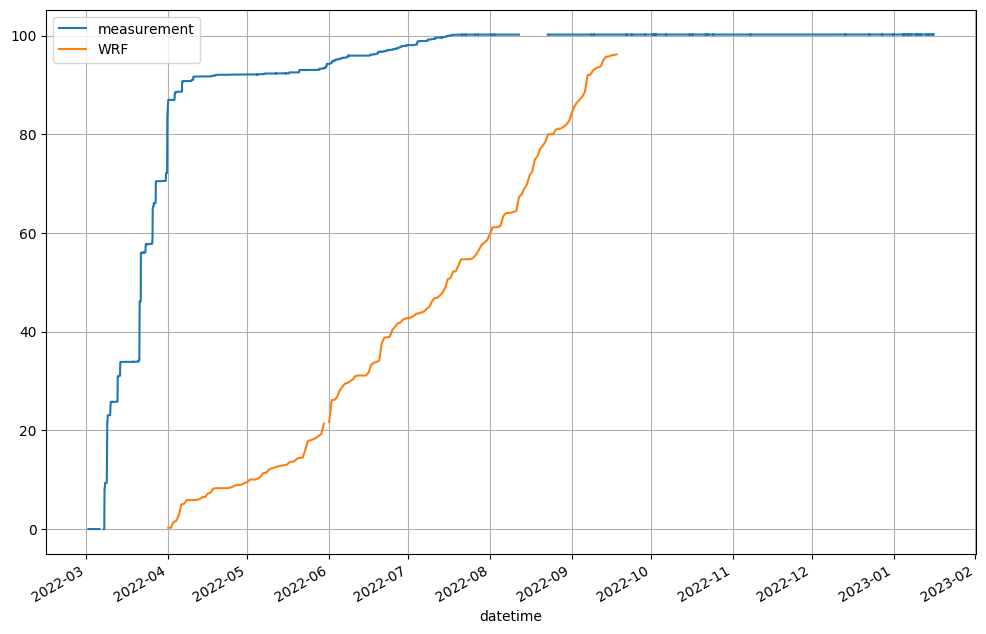

In [113]:
df = darwin.open_measurements(folder + "26_AWS-PPuertoAyora_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
datasets['MM']["puertoayora"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

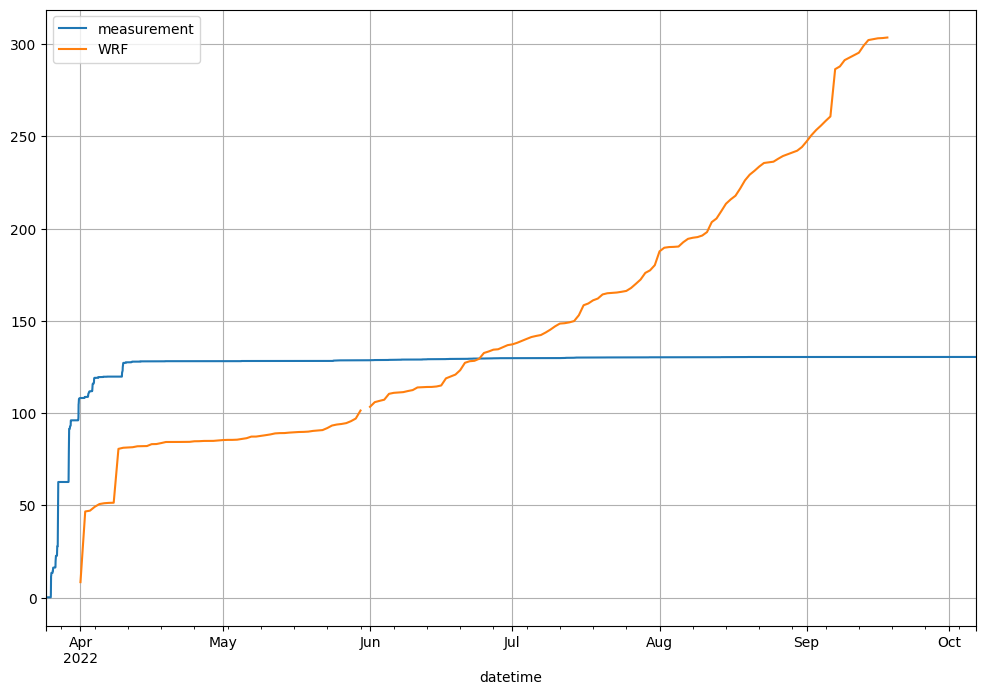

In [115]:
df = darwin.open_measurements(folder + "09_AWS-PSantaRosa_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
datasets['MM']["rosa"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [77]:
df = darwin.open_measurements(folder + "30_AWS-PMinasRojas_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["minasrojas"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

NameError: name 'open_measurements' is not defined

In [78]:
df = darwin.open_measurements(folder + "20_AWS-PElJunco_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["eljunco"].loc["2022-05-20":"2022-08-18"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

NameError: name 'open_measurements' is not defined

In [ ]:
df = darwin.open_measurements(folder + "22_AWS-PPuertoBaquerizoMoreno_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["puertobaccerizomoreno"].loc[:"2022-08-19"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df = darwin.open_measurements(folder + "18_AWS-PLaGalapaguera_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["lagalapaguera"].loc[:"2022-08-19"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df = darwin.open_measurements(folder + "14_AWS-PSierraNegra_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["negra"].loc[:"2022-09-02"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df["PCP_diff_radar"],wrf_prcp["cuevadesucre"].loc[:"2022-09-01"])
plt.grid()

In [ ]:
df = darwin.open_measurements(folder + "16_AWS-PCuevadeSucre_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["cuevadesucre"].loc[:"2022-09-02"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df["PCP_diff_radar"].sort_values(),wrf_prcp["cuevadesucre"].loc[:"2022-09-01"].sort_values())
plt.grid()